In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


In [2]:
# Load the data
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path,index_col=0)
df_crypto.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# to check true of falss
df_crypto.IsTrading.value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [4]:
#droping all false in rows
df_crypto=df_crypto.loc[df_crypto.IsTrading==True]

In [5]:
#checking
df_crypto.IsTrading.value_counts()

True    1144
Name: IsTrading, dtype: int64

In [6]:
#drop Istrading
df_crypto.drop(columns="IsTrading",inplace=True)


In [7]:
df_crypto

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
#droping na in rows. 0 for dropping row and 1 for dropping colomn
df_crypto.dropna(axis=0,how="any",inplace=True)

In [9]:
#filter crypto mines greater than 0
df_crypto=df_crypto.loc[df_crypto.TotalCoinsMined>0]

In [10]:
#CoinName
df_crypto.drop(columns="CoinName",inplace=True)

C:\Users\rajiv\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
df_crypto

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [12]:
#Algorithm and ProofType, into numerical data
X=pd.get_dummies(data=df_crypto,columns=["Algorithm","ProofType"])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Scale the data
Scaler = StandardScaler().fit(X)
X_scaled=Scaler.transform(X)

In [14]:
#performed PCA and reduction of the colomn
PCA_model=PCA(n_components=0.90).fit(X_scaled)
XPCA=PCA_model.transform(X_scaled)
XPCA.shape

(532, 74)

In [15]:
PCA_model.explained_variance_.sum()

88.47283457566158

In [16]:
pd.DataFrame(XPCA)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,8.679146e-15,3.715427e-12,-1.724682e-14,-0.007129,-1.319756,-0.051813,...,-1.986834e-16,-5.266562e-16,1.909086e-15,-3.880726e-15,9.310178e-16,1.182591e-15,-2.100969e-15,-4.330538e-15,5.059186e-15,2.341978e-16
1,-0.318434,1.032331,-0.591126,0.001386,8.682615e-15,3.685101e-12,-1.725376e-14,-0.007739,-1.322514,-0.056674,...,-2.056223e-16,-5.266562e-16,1.912556e-15,-3.880726e-15,9.275483e-16,1.182591e-15,-2.114846e-15,-4.334007e-15,5.059186e-15,2.341978e-16
2,2.305468,1.656383,-0.683617,0.004731,1.227696e-14,1.259248e-11,-2.373469e-14,-0.054781,-1.542879,-0.943951,...,8.818409e-15,-2.289071e-14,-6.378836e-14,9.613129e-14,-3.856864e-14,-7.608373e-14,8.561359e-14,7.770454e-14,-1.176812e-13,-5.066085e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.420604e-15,-3.269518e-12,4.988971e-15,-0.002071,0.281463,0.251862,...,-1.687076e-15,-1.016651e-14,-1.570530e-14,8.640509e-15,-5.189087e-15,-1.179488e-14,9.820051e-15,2.024182e-14,-1.050649e-14,-3.616888e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-7.173747e-15,-4.534589e-12,1.298605e-14,0.027735,0.519099,0.188820,...,-6.866822e-14,-1.460474e-13,-7.943557e-14,-1.021594e-14,9.956046e-14,2.089425e-14,2.441948e-14,-5.319249e-14,3.688963e-14,-4.135406e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,5.223455e-15,-2.187614e-11,-2.612588e-15,-0.851713,2.041159,3.560713,...,-3.478696e-16,-1.301580e-14,-1.957026e-14,1.074993e-14,-2.125565e-15,-1.247228e-14,1.617087e-14,2.220553e-14,-1.160890e-14,-3.136370e-15
528,-0.333144,1.032071,-0.590740,0.001399,8.679146e-15,3.721599e-12,-1.725029e-14,-0.007154,-1.320125,-0.052460,...,-2.056223e-16,-5.266562e-16,1.909086e-15,-3.880726e-15,9.310178e-16,1.182591e-15,-2.100969e-15,-4.334007e-15,5.059186e-15,2.341978e-16
529,0.324349,-2.312308,0.421515,-0.001319,-5.574332e-15,-3.508139e-12,1.222624e-14,0.017309,0.161077,-0.047787,...,-2.033188e-14,-6.848445e-14,-5.017078e-14,1.788312e-14,3.999352e-14,1.880565e-14,4.820601e-14,4.973906e-14,2.677272e-14,2.069535e-15
530,-0.149364,-2.049336,0.412968,-0.001745,-7.045377e-15,-4.641961e-12,1.311095e-14,0.028954,0.544389,0.233373,...,-2.575255e-15,9.218379e-16,6.011049e-16,-2.655618e-16,-1.709231e-15,1.014323e-15,7.717334e-16,3.942358e-15,-4.624389e-16,1.200439e-15


In [17]:
#performed Tsne to do further reduction of the colomns
tsne_model=TSNE()
Xtsne=tsne_model.fit_transform(XPCA)
Xtsne.shape

(532, 2)

In [18]:
#TSNE is just for observing te data 
Xtsne

array([[  5.034198 ,  14.878811 ],
       [  3.6506803,  21.204351 ],
       [  7.150159 ,  29.452719 ],
       ...,
       [-25.709255 ,  -3.338041 ],
       [-18.512598 , -11.413101 ],
       [  1.2396494, -11.052369 ]], dtype=float32)

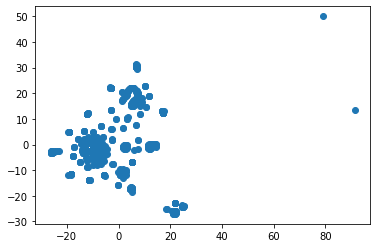

In [22]:
plt.scatter(Xtsne[:,0],Xtsne[:,1])

I can see distinct cluster but also some outliers on 80,50 and 20,-20. Hence, clustering wont work. 

In [28]:
res = []
current_number_of_clusters = range(1,11) # Create a list with values 2 to 10

for curr_clusters in current_number_of_clusters:
    kmeans_model = KMeans(n_clusters=curr_clusters)
    kmeans_model.fit(XPCA)
    res.append(kmeans_model.inertia_)

res

C:\Users\rajiv\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[46979.075159676286,
 46085.80637501442,
 44843.063786382045,
 43588.01101024127,
 42922.173130412,
 42377.48671162489,
 41862.669789996005,
 41280.23148084838,
 39933.24270350412,
 38364.62938085401]

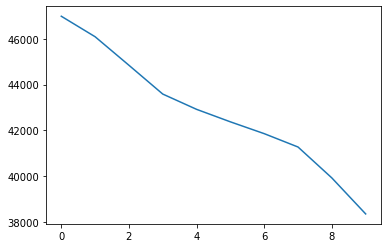

In [29]:
plt.plot(res)

Cryptocurrencies cannot be clustered together as all crypto data we got do not have similar characteristics. If we want to find similarity then we need more data (columns)